## ITCR - Escuela de Computación
### Procesamiento de Lenguaje Natural (NLP) con Aprendizaje Automático

### Extracción de características en textos

**Profesora: María Auxiliadora Mora**

#### Introducción 

La **extracción de características** consiste en obtener datos de los textos y **producir representaciones de características que sean apropiadas** para el tipo de tarea en NLP que se está tratando de realizar y el tipo de algoritmo que se tiene planificado utilizar.

Este documento presenta algunos ejemplos de métodos de extracción de características basados en (Scikit-Learn,2022; Brownlee, 2017a; Brownlee, 2017b). 

Los contenidos de **los textos no pueden utilizarse directamente en algoritmos de NLP**, ya que la mayoría de ellos esperan vectores de características numéricas con un tamaño fijo en lugar de documentos de texto sin procesar con longitud variable.

Debio a lo anterior, las bibliotecas de NLP proporcionan funcionalidad para extraer características numéricas del contenido del texto, entre estas:

- **Tokenizar y asignar una identificación (un número entero) a cada token**, por ejemplo, en el caso del español se usan espacios en blanco y puntuación como separadores de tokens.

- **Contar las ocurrencias** de cada token en cada documento.

- Normalizar y **asignar un peso a las ocurrencias de tokens de acuerdo a su importancia**.


Las características y muestras se definen de la siguiente forma:

- Las **frecuencia de ocurrencia de token individual** (normalizada o no) se trata como una característica.

- El **vector de todas las frecuencias de los tokens para un documento dado** se considera una muestra multivariada.

Por lo tanto, **un corpus de documentos puede representarse mediante una matriz con una fila por documento y una columna por token que aparecen en el corpus** (o alrevés).

Se denomina **vectorización** al proceso general de convertir una colección de documentos de texto en vectores de características numéricas. La estrategia específica, que consiste en tokenización, conteo y normalización, se denomina **Bolsa de Palabras o “Bolsa de n-gramas”**. Los documentos se describen por ocurrencias de palabras mientras se ignora por completo la información de posición relativa de las palabras en el documento. La siguiente imagen (fuente: datapeaker.com) es un ejemplo de esta representación.

![](../imagenes/Feature_extraction.png)


**Sparsity**
La mayoría de los documentos generalmente utilizan un subconjunto muy pequeño de las palabras del corpus, entonces la matriz resultante va a contener muchos valores de características en ceros (típicamente más del 99% de ellas).

Por ejemplo, una colección de 10,000 documentos de texto cortos (como correos electrónicos) utilizará un vocabulario con un tamaño en el orden de 100,000 palabras únicas en total, mientras que cada documento usará de 100 a 1000 palabras únicas individualmente.

Para poder almacenar dicha matriz en la memoria pero también acelerar las operaciones algebraicas Matrix / Vector, las implementaciones generalmente utilizan una matrzi rala, como las implementaciones disponibles en el paquete Scipy.sparse.

**Bolsa de palabras (Bag-of-Words o BOW)**
El modelo de bolsa de palabras es una representación simplificada utilizada en NLP. En este modelo, un texto se representa como la bolsa de sus palabras, prescindiendo de la gramática e incluso del orden de las palabras pero manteniendo la multiplicidad. 

Una bolsa de palabras es una representación de texto que describe la ocurrencia de palabras dentro de un documento. Se sustenta en dos elementos:

- Un vocabulario de palabras conocidas.
- Una medida de la presencia de palabras conocidas.

Por ejemplo, si se utiliza la clase CountVectorizer de la biblioteca de Scikit-Learn podemos extraer características de un corpus de la siguiente forma:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 

corpus = ['This is the first document.',
          'This is the second second document.',
          'And the third one and the second.',
          'Is this the first document?']
X = vectorizer.fit_transform(corpus)
print(X.shape)

(4, 9)


In [2]:
# Extraer los nombres de las características

print(vectorizer.get_feature_names())

# Extraer la matriz de caractarísticas
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [2 0 0 0 1 1 2 1 0]
 [0 1 1 1 0 0 1 0 1]]


/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**CountVectorizer**

Convierte una colección de documentos de texto en una matriz que contiene el conteo de ocurrencias de tokens. Adicionalment, se puede realizar un preprocesmiento del texto.

Por ejemplo, se puede realizar:

- **strip_accents** {‘ascii’, ‘unicode’}, default=None. Elimina los acentos y realiza otra normalización de caracteres durante el preprocesamiento.  
   - 'ascii' es un método rápido que solo funciona en caracteres que tienen un mapeo ASCII directo. 
   - 'unicode' es un método un poco más lento que 
        funciona con cualquier carácter.

- **lowercase**: bool, default=True. Convierte todos los caracteres a minúsculas antes de tokenizar.
   
- **stop_words**, list, default=None
   
- **token_pattern**: permite utilizar expresiones regulares para definir qué es un token. El es default=r”(?u)\b\w\w+\b” Solo se usa si analyzer == 'word'. La expresión regular define token como dos o más caracteres alfanuméricos (la puntuación se ignora por completo y siempre se trata como un separador de token). (?u) corresponde a la bandera UNICODE.    


In [7]:
# Posición en la lista de palabras
print(vectorizer.vocabulary_.get('second'))

5


In [9]:
# ¿Qué pasa con las palabras que no están en el corpus?
print(vectorizer.transform(['Aparece algo nuevo en otro idioma.']).toarray())

[[0 0 0 0 0 0 0 0 0]]


In [10]:
# Para conservar parte de la información del orden de las palabras
# se pueden extraer bi-gramas y palabras individuales.
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                    token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
print(analyze('Bi-grams are cool!'))

['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool']


In [11]:
# Procesamos el corpus con bi-gramas
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()

# Extraer los nombres de las características
print(bigram_vectorizer.get_feature_names())

# Extraer la matriz de caractarísticas
print(X_2)

['and', 'and the', 'document', 'first', 'first document', 'is', 'is the', 'is this', 'one', 'one and', 'second', 'second document', 'second second', 'the', 'the first', 'the second', 'the third', 'third', 'third one', 'this', 'this is', 'this the']
[[0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0]
 [0 0 1 0 0 1 1 0 0 0 2 1 1 1 0 1 0 0 0 1 1 0]
 [2 2 0 0 0 0 0 0 1 1 1 0 0 2 0 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1]]


**Stop words**
Las 'stop words' son tokens poco informativos para representar el contenido de un texto y se pueden eliminar para evitar que se interpreten y se utilicen en procesos de predicción. A veces, sin embargo, pueden ser útiles para predecir el estilo de escritura o la personalidad del que escribe.

### Frecuencia de término - frecuencia inversa de documento (TF-IDF o Term-frequency Inverse document-frequency)

En un corpus grande, algunas palabras van a estar muy bien representadas (ej., "the", "a", "is" en inglés), por lo que van a aportar muy poca información significativa sobre el contenido real del documento. Estas apalabras se conocen comunmente como stop words. Dependiendo de la actividades de NLP y sobre todo de los datos a utilizar, si se extraen características directamente del texto sin tratar de disminuir el efecto de las stop words, puede ser que los resultados no sean los deseados.

El enfoque consiste en **penalizar las puntuaciones de palabras frecuentes como los artículos, conjunciones, preposiciones, entre otros**. En este enfoque:

- **Frecuencia de términos**: es una puntuación de la frecuencia de la palabra en el documento actual.

- **Frecuencia inversa de documento**: es una puntuación de cuán rara es la palabra en el corpus.

Las puntuaciones tienen el efecto de resaltar palabras que son distintas (contienen información útil) en un documento determinado.

**Es muy común usar la transformación TF-IDF**. Originalmente **el algoritmo fue desarrollado para la recuperación de información** (como una función de clasificación para los resultados de los motores de búsqueda) pero también ha sido aplicado a la clasificación y agrupación de documentos.

$$ tf-idf(t,d) = tf(t,d) * idf(t) $$

Que calcula la frecuencia del término $tf(t,d)$, es decir el número de veces que aparece un término en un documento determinado y esta se multiplica por el componente $idf(t)$, que se calcula como (de acuerdo con la implementación del Scikit-Learn de la función TfidfTransformer y TfidfVectorizer):

$$idf(t)=\log\frac{1+n}{1+df(t)}+1$$

Donde $n$ corresponde al número total de documentos, $df(t)$ es el número de documentos del conjunto que contienen el término. Los vectores Tf-idf resultantes luego se normalizan usando la norma Euclidiana:
$$V_{norm}=\frac{v}{||v||_{2}}$$



In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()

In [18]:
# En el siguiente ejemplo: 

counts = [[3, 0, 1],
          [2, 0, 0],
          [3, 0, 0],
          [4, 0, 0],
          [3, 2, 0],
          [3, 0, 2]]

tfidf = transformer.fit_transform(counts)

tfidf.toarray()

array([[0.85151335, 0.        , 0.52433293],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.55422893, 0.83236428, 0.        ],
       [0.63035731, 0.        , 0.77630514]])

Como tf–idf se usa muy a menudo para extracción de características de texto, Scikit-Learn implementa una clase llamada TfidfVectorizer que combina todas las opciones de CountVectorizer y TfidfTransformer. Es decir:

### TfidfVectorizer = CountVectorizer + TfidfTransformer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_3= vectorizer.fit_transform(corpus)

print('====================================')
print(corpus)
print('====================================')

#Matriz de características
print(X_3.toarray())

# Extraer los nombres de las características
print(vectorizer.get_feature_names())

['This is the first document.', 'This is the second second document.', 'And the third one and the second.', 'Is this the first document?']
[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.3199074  0.         0.3199074  0.         0.79029857
  0.26154526 0.         0.3199074 ]
 [0.72024192 0.         0.         0.         0.36012096 0.2839235
  0.37585211 0.36012096 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Limitaciones de las bolsa de palabras

El modelo de bolsa de palabras es muy simple de entender e implementar y ofrece mucha flexibilidad para la personalización de datos de texto específicos. Se ha utilizado con gran éxito en problemas de predicción como modelización de lenguaje y clasificación de documentos.

Sin embargo, adolece de algunas deficiencias, tales como:

- Vocabulario: el vocabulario requiere un diseño cuidadoso, por ejemplo, para administrar el tamaño de la representación de los documentos.

- Dispersión: las representaciones dispersas son más difíciles de modelar tanto por razones computacionales (complejidad de espacio y tiempo) como por razones de información, donde el desafío es que los modelos aprovechen tan poca información en un espacio de representación tan grande.

- Significado: descartar el orden de las palabras ignora el contexto y, por lo tanto, el significado de las palabras en el documento (semántica). El contexto y el significado pueden ofrecer mucho al modelo.

### Word embeddings

Los algoritmos de word embeddings como word2vec y GloVe son clave para los resultados de vanguardia logrados por los modelos de redes neuronales en problemas de procesamiento del lenguaje natural. Estos algoritmos representan una mejora con respecto a los esquemas de bolsa de palabras más simples, que describen documentos pero no el significado de las palabras.  

Word embeddings es un enfoque para proporcionar una representación vectorial densa de palabras que captura parte del significado del texto. Esta representación muestra con qué frecuencia una palabra aparece cerca de otras palabras, un factor importante en la forma en que se usan. **Por ejemplo**, la palabra Juegos Olímpicos puede aparecer cerca de palabras como correr, saltar y lanzar, pero con menos frecuencia junto a palabras como electrón o átomo.

Word embeddings funciona mediante el uso de algoritmos para entrenar un conjunto de vectores densos de valores continuos de longitud fija basados en un gran corpus de texto. Cada palabra está representada por un punto en el espacio n dimensional y esta representación se aprende en función de las palabras que rodean la palabra objetivo.

La representación del espacio vectorial de las palabras proporciona una proyección donde las palabras con significados similares se agrupan localmente dentro del espacio.


### word2vec

Word2vec es un algoritmo para apredizaje de word embeddings a partir de un corpus de texto.

Los modelos de Word2Vec requieren mucho texto para entrenar, por ejemplo, todo el corpus de Wikipedia. 

Para el ejemplo, se va a utilizar la biblioteca de código abierto Gensim de Python.

Algunos de los parámetros requeridos por la clase Word2vec de Gensim se describen a continuación:

- size: (default 100) El número de dimensiones del espacio, p. la longitud del vector para representar cada token.

- window: (default 5) La distancia máxima entre una palabra objetivo y las palabras alrededor de la palabra objetivo.

- min_count: (default 5) El recuento mínimo de palabras a considerar al entrenar el modelo; las palabras con una aparición menor que este número serán ignoradas.

- workers: (default 3) El número de subprocesos a usar durante el entrenamiento.

- sg: (defualt 0 o CBOW) El algoritmo de entrenamiento, ya sea CBOW (0) o salto de gramo (1).  Hay dos algoritmos de entrenamiento principales que se pueden usar en word embeding; son bolsa continua de palabras (CBOW) y skip grams. Estos algoritmos generalmente trabajan con una ventana de palabras para cada palabra objetivo para proporcionar contexto, este enfoque fue desarrollado por Tomas Mikolov (durante su trabajo en Google).

In [32]:
#!pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 4.4 MB/s eta 0:00:01
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1


In [21]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec

# Cargar el corpus (http://icame.uib.no/brown/bcm.html)
# BROWN fue el primer corpus general disponible en formato electrónico. 
# Se inició en Brown University en los años 60 y contiene
# 500 textos en inglés, con un total de aproximadamente un millón de palabras, 
nltk.download("brown")

# Preprocesamiento de datos para convertir a minúsculas las palabras 
# y eliminar signos de puntuación.
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

# Entrenar el modelo
model = Word2Vec(
    sentences = data,
    vector_size=100, 
    workers=4,
    window = 10,
    min_count = 8)

# Salvar el modelo
print("Modelo generado")
print(model)
model.save('model.bin')

# Cargar modelo
new_model = Word2Vec.load('model.bin')
print("Modelo cargado")
print(new_model)


[nltk_data] Downloading package brown to /home/mmora/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Modelo generado
Word2Vec(vocab=10003, vector_size=100, alpha=0.025)
Modelo cargado
Word2Vec(vocab=10003, vector_size=100, alpha=0.025)


In [22]:
# Encontrar palabras similares
print("Palabras más similares a car")
words = model.wv.most_similar("car", topn=7)
for word in words:
  print(word)
print()

Palabras más similares a car
('room', 0.9213138222694397)
('door', 0.9115716218948364)
('kitchen', 0.9092123508453369)
('road', 0.9087992906570435)
('house', 0.9015535712242126)
('front', 0.8863642811775208)
('window', 0.8859817385673523)



In [23]:
# Obtener el vector de una palabra
print("Vector para la palabra computer:")
print(model.wv["computer"])
print()


Vector para la palabra computer:
[-0.03604862  0.05121509 -0.02396346 -0.0085889  -0.05040662 -0.03673574
  0.00179215  0.0722314  -0.05065439 -0.07554799 -0.03139101 -0.09836347
 -0.0049033  -0.00584337  0.03154455 -0.06173988  0.0586599  -0.02589302
 -0.02334855 -0.11061144  0.1346137  -0.07496943  0.09068335  0.01085116
  0.0394261  -0.02411014 -0.01287874  0.00637258 -0.03041109  0.08109049
  0.0612925  -0.02578927  0.04342756 -0.04670171  0.01775894 -0.03444069
  0.0657719  -0.02215198 -0.01282383 -0.05879624  0.05167796 -0.09366933
 -0.06408255  0.04367359  0.06287163 -0.06450263 -0.00520573 -0.05946862
  0.12522626  0.05857875 -0.01202331 -0.12489131  0.01071086  0.01485831
  0.00760071  0.02070701  0.02110663 -0.05841156 -0.07881989  0.11259755
 -0.0217547   0.01374645  0.01781989  0.02159745  0.03020551  0.0891817
  0.01713677  0.05191241 -0.04623032  0.03701176  0.04663664 -0.01699249
  0.07375539  0.01142242  0.07182162  0.02218673  0.04478203  0.02686435
 -0.01657715 -0.070

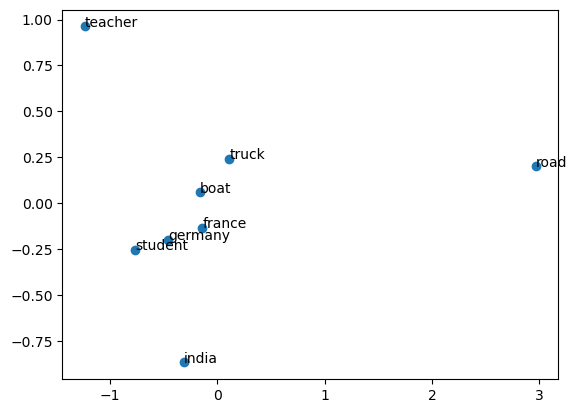

In [24]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

#Visualizar datos
def plot_words(words):
    # Extraer los vectores de las palabras 
    X = model.wv[words]

    # Análisis de componentes principales para reducir la dimensionalidad de los datos
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
 
    # Visualización    
    pyplot.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    pyplot.show()
    
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]
plot_words(words)    

In [26]:
"""
Algo interesante, es que se puede hacer cálculos de álgebra lineal con palabras. Actualmente, 
investigadores exploran algunas de las propiedades matemáticas de este espacio vectorial: 
por ejemplo, que al sumar y restar vectores produce otro vector en el mismo espacio.

Un ejemplo popular, descrito en conferencias y documentos de introducción a la 
linguistica computacional es:

queen = (king - man) + woman

Es decir, la palabra reina es la palabra más cercana dada la resta 
de la noción de hombre de la noción de rey y la suma de la palabra mujer. 
La "masculinidad" en el rey se reemplaza con la "feminidad" para darnos la reina. 
"""

result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('twenty-one', 0.9177592396736145)]


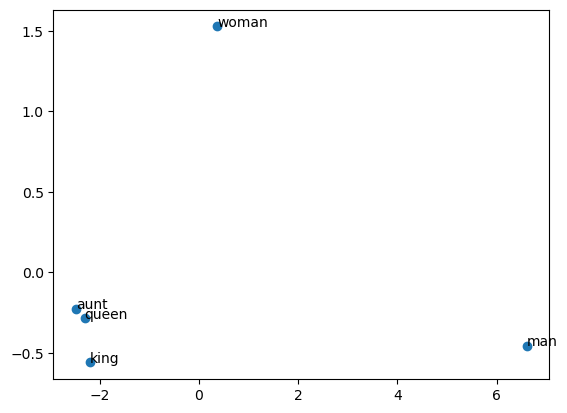

In [27]:
words = ["queen", "king", "man", "aunt", "woman"]

plot_words(words)    

### Referencias

Scikit-Learn (2022). 6.2. Feature extraction. Recuperado de https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

Brownlee , J. (2017a). A Gentle Introduction to the Bag-of-Words Model. Recuperado de https://machinelearningmastery.com/gentle-introduction-bag-words-model/

Brownlee , J. (2017b). How to Develop Word Embeddings in Python with Gensim. Recuperado de https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Brownlee, J. (2017c). What Are Word Embeddings for Text?. Recuperado de https://machinelearningmastery.com/what-are-word-embeddings/

radimrehurek.com (s.f.). Gensim Manual: Word2vec embeddings. Recuperado dehttps://radimrehurek.com/gensim/models/word2vec.html
